# Introduction : Analyse du jeu de données MPG

Dans ce tutoriel, nous allons explorer en détail le jeu de données "mpg". Ce jeu de données, initialement publié par la bibliothèque StatLib de l'Université Carnegie Mellon et désormais disponible dans la bibliothèque Seaborn. L'objectif de ce tutoriel est d'explorer la relation entre la consommation de carburant (Miles Per Gallon, ou MPG) et diverses autres caractéristiques de ce jeu de données.

Le jeu de données "mpg" est particulièrement intéressant pour notre étude car il présente une combinaison de caractéristiques discrètes et continues. Il contient :

- 3 caractéristiques discrètes : Ces variables catégorielles nous permettront d'analyser des groupes ou des classifications au sein des données.
- 5 caractéristiques continues : Ces variables numériques nous permettront d'examiner des relations et des tendances quantitatives.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Distribution de la consommation (MPG)

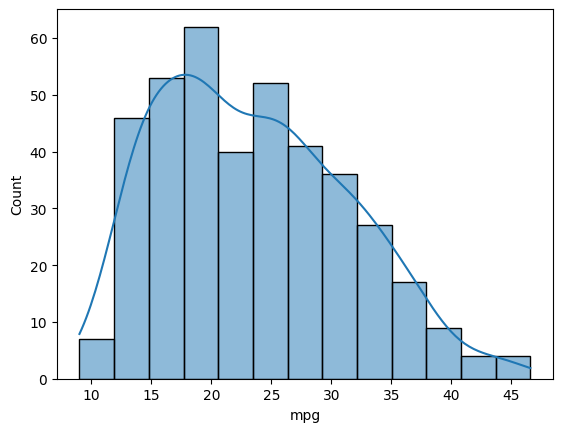

In [28]:
sns.histplot(data=mpg_df, x="mpg", kde=True)
plt.show()

On peut voir qu'une majorité des véhicules ont un mpg vers 20.
On peut voir la distribution des véhicules en fonction de la consommation mpg.

## Répartition des des origines des voiture

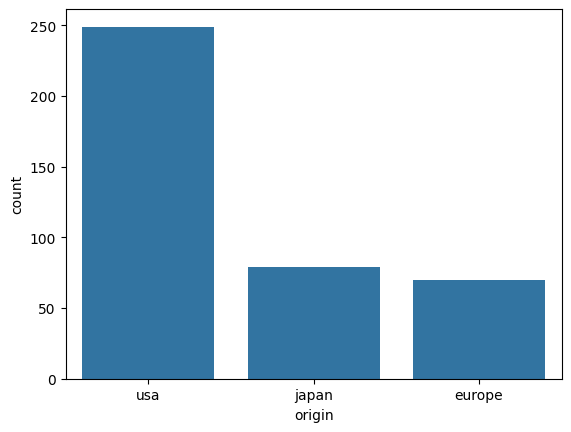

In [27]:
sns.countplot(data=mpg_df, x="origin")
plt.show()

On peut voir que la majorité des entrées dans le dataset sont d'origine étatsunienne. Ce qui pourra impacter les prochaines visualisations.

## Relation entre poids et consommation

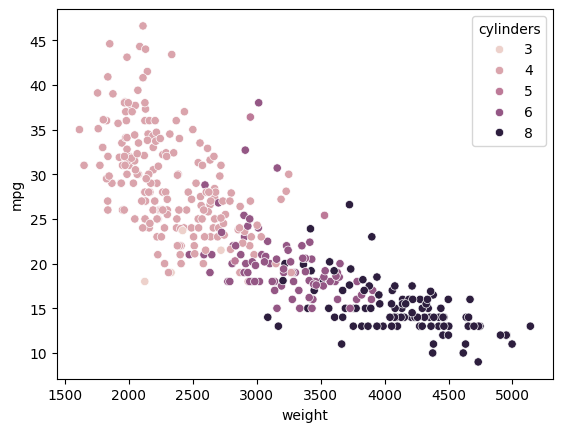

In [29]:
sns.scatterplot(data=mpg_df, x="weight", y="mpg", hue="cylinders")
plt.show()

On peut remarquer qu'une tendance semble ressortir : Plus la voiture est lourde plus la consommation (mpg) est faible et donc plus la voiture consomme. On peut également voir que les véhicule avec plus de cylindres ont tendance à être plus lourd.

## Régressions linéaires entre cylindrée et consommation

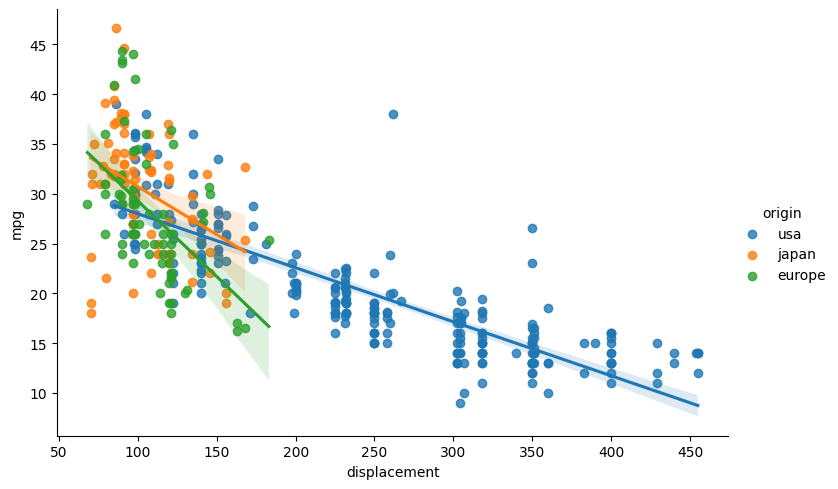

In [17]:
sns.lmplot(data=mpg_df, x="displacement", y="mpg", hue="origin", aspect=1.5)
plt.show()

Un tendance générale se dégage : Les pentes sont négatives quand la cylindrée augmente et donc la consommation (MPG) diminue.
Cela reflète une relation inverse entre la taille du moteur et l'efficacité énergétique.

Les véhicules japonais et européens ont tendance à avoir une consommation plus efficace pour un même displacement comparé aux véhicules américains.

Les constructeurs japonais/européens semblent privilégier des moteurs plus petits et plus efficient.
Les constructeurs américains ont des moteurs plus puissants mais aussi plus consommateur en carburant.

## Matrice de corrélation & Relations entre les variables

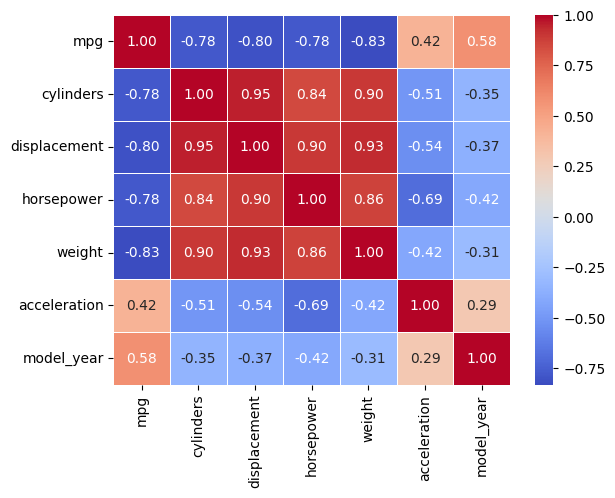

In [34]:
corr = mpg_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=.5)
plt.show()

mpg vs weight: -0.83 --> Plus un véhicule est lourd plus la consommation est élevée.

mpg vs displacement: -0.80 -> Plus le moteur est gros plus la consommation est élevée.

mpg vs horsepower: -0.78 --> Plus le véhicule est puissant plus la consommation est élevée.

horsepower vs acceleration: -0,69 --> Plus le vehicule est puissant plus il a une accélération élévée.

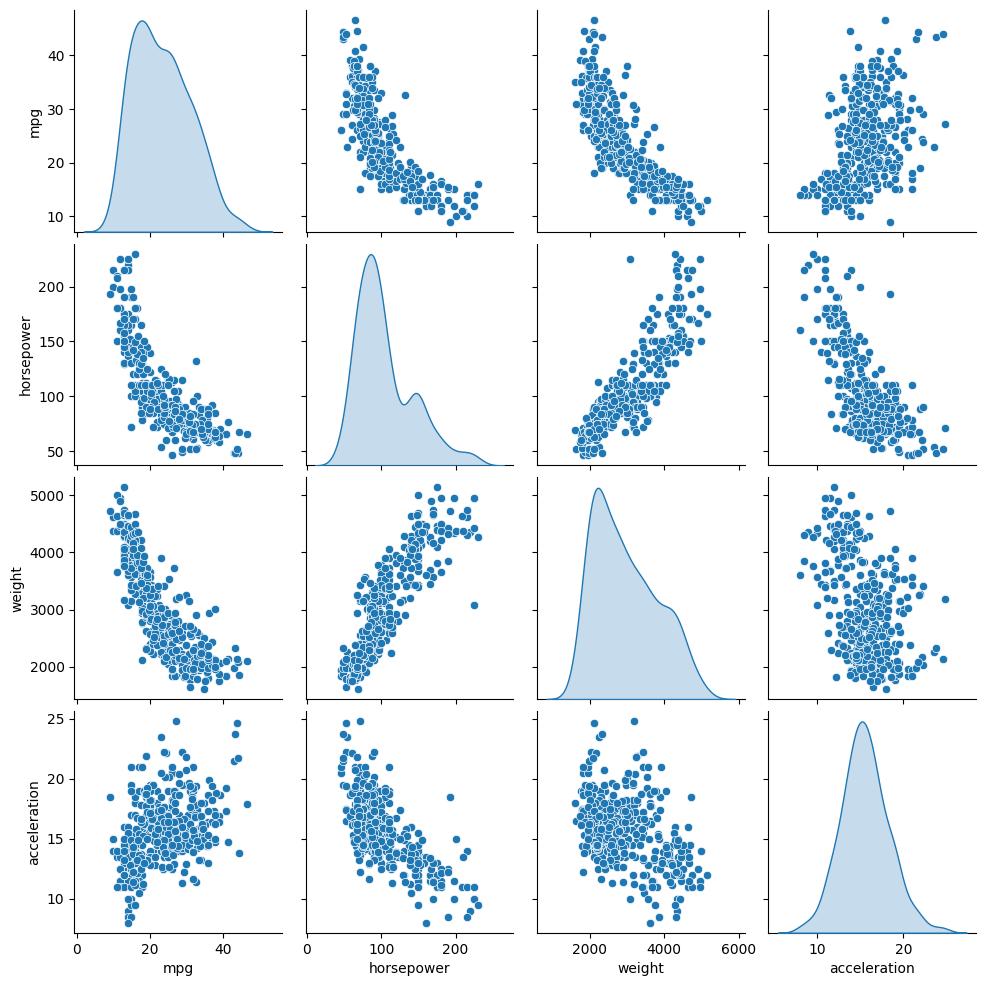

In [31]:
sns.pairplot(mpg_df[["mpg", "horsepower", "weight", "acceleration"]], diag_kind="kde")
plt.show()

weight vs horsepower: Le weight semble augmenter proportionnelement au horsepower

## Exploration des tendance de mpg par origine

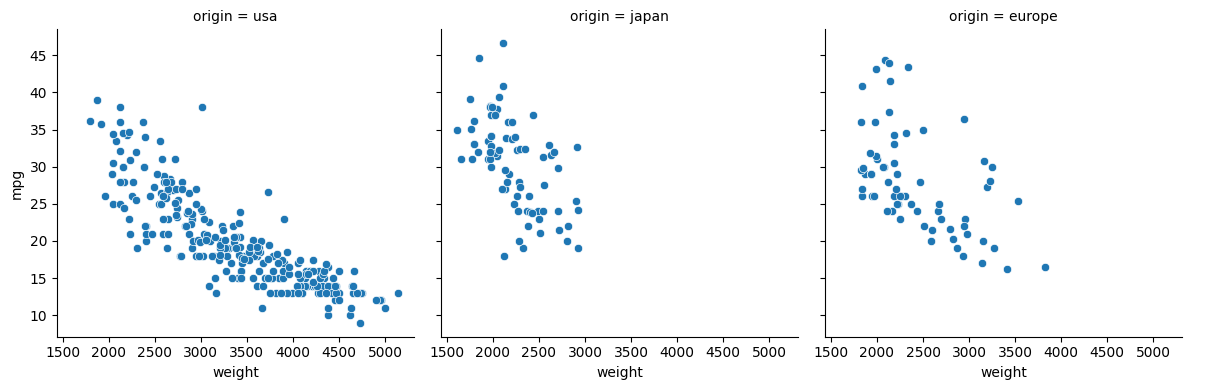

In [24]:
g = sns.FacetGrid(mpg_df, col="origin", height=4, aspect=1)
g.map(sns.scatterplot, "weight", "mpg")
g.add_legend()
plt.show()

La tendance générale semble dire que plus le poids et élévé moi le mpg sera élevé (donc la consommation élevée). Le nombre d'entrées pour les véhicule japonnais et européens ne sont pas suffisant pour pouvoir dégager une tendance vraiment claire.

## Conso par nombre de cylindres

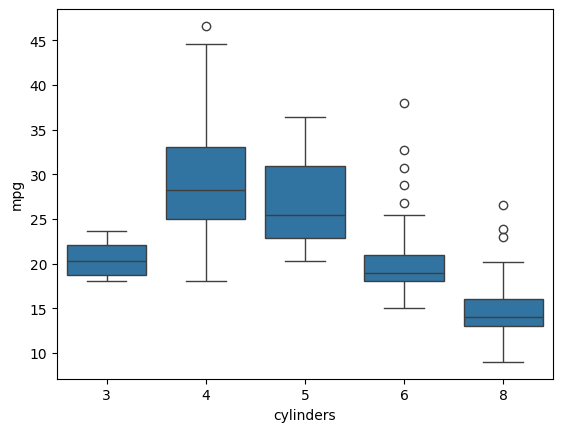

In [26]:
sns.boxplot(data=mpg_df, x="cylinders", y="mpg")
plt.show()

Les véhicules avec 4 cylindres ont un mpg beaucoup plus variable mais aussi nettement plus élevée en moyenne.

À partir de 6 et 8 cylindres, la médiane baisse et la dispersion est plus faible.

Il y a plusieurs outliers ce qui pourrait indiquer des voitures atypiques.